In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import segmentation_stf_kfold

import warnings
warnings.filterwarnings('ignore')

loading annotations into memory...
Done (t=4.78s)
creating index...
index created!


In [2]:
dataset = segmentation_stf_kfold.dataset
cat_names = segmentation_stf_kfold.cat_names

<AxesSubplot:xlabel='Number of annotations', ylabel='Categories'>

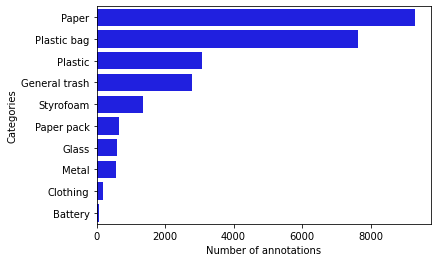

In [3]:
# Dataset distribution
cat_dist = segmentation_stf_kfold.category_annotations(dataset).reshape(len(dataset['categories']),)
cat_dist = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_dist})
cat_dist = cat_dist.sort_values('Number of annotations', 0, False)
sns.barplot(x="Number of annotations", y="Categories", data=cat_dist, label="Total", color="b")

[Text(0.5, 0, 'Number of annotations')]

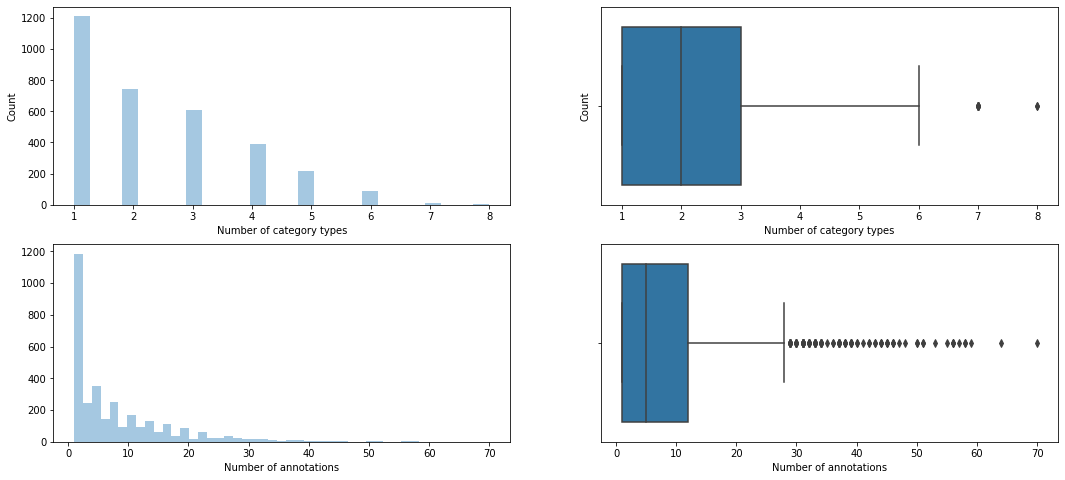

In [4]:
# Dataset distribution
df = segmentation_stf_kfold.get_dataframe(dataset)
all_cat_num = df.groupby('image_id')['category_id'].apply(lambda x: len(set(x))).values
all_ann_num = df.groupby('image_id').apply(lambda x: len(x)).values

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18, 8)
sns.distplot(all_cat_num, ax=axes[0][0], kde=False)
sns.boxplot(all_cat_num, ax=axes[0][1])
sns.distplot(all_ann_num, ax=axes[1][0], kde=False)
sns.boxplot(all_ann_num, ax=axes[1][1])

axes[0][0].set(xlabel='Number of category types', ylabel='Count')
axes[0][1].set(xlabel='Number of category types', ylabel='Count')
axes[1][0].set(xlabel='Number of annotations')
axes[1][1].set(xlabel='Number of annotations')

In [5]:
# Basic statistics
print('Number of category types')
print(pd.Series(all_cat_num).describe())
print('\n')

print('Number of annotations')
print(pd.Series(all_ann_num).describe())

Number of category types
count    3271.000000
mean        2.379700
std         1.419654
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
dtype: float64


Number of annotations
count    3271.000000
mean        8.022012
std         8.937678
min         1.000000
25%         1.000000
50%         5.000000
75%        12.000000
max        70.000000
dtype: float64


In [6]:
# Label standard deviation
type_list = [[1,2,3,4], [5,6], [7,8]]
num_list = [20, 30]
split_num = 5

segmentation_stf_kfold.split_data('metric', dataset, split_num, type_list, num_list)

cat_ann_std : 0.20553737942091593
cat_type_std : 0.19255025052272767
ann_num_std : 0.15026612383868101


In [7]:
# Label standard deviation
type_list = [[1,2,3], [4,5,6], [7,8]]
num_list = [1, 10, 50]
split_num = 5

segmentation_stf_kfold.split_data('metric', dataset, split_num, type_list, num_list)

cat_ann_std : 0.19210083939951078
cat_type_std : 0.19750719151777518
ann_num_std : 0.15393327893262918


In [8]:
# Label standard deviation
type_list = [[1], [2, 3, 4], [5, 6], [7, 8]]
num_list = [1, 20]
split_num = 5

segmentation_stf_kfold.split_data('metric', dataset, split_num, type_list, num_list)

cat_ann_std : 0.17092175970912074
cat_type_std : 0.19932737002847847
ann_num_std : 0.14679477752966374


In [9]:
# Label standard deviation
type_list = [[1], [2, 3, 4], [5, 6], [7, 8]]
num_list = [23, 35]
split_num = 5

segmentation_stf_kfold.split_data('metric', dataset, split_num, type_list, num_list)

cat_ann_std : 0.12692262314399466
cat_type_std : 0.19914442897063622
ann_num_std : 0.14979432804352336


In [10]:
#load split data
type_list = [[1], [2, 3, 4], [5, 6], [7, 8]]
num_list = [23, 35]
split_num = 5

train_json_list, val_json_list, train_data_list, val_data_list = segmentation_stf_kfold.split_data('load', dataset, split_num, type_list, num_list)

Fold 1 has all categories
Fold 2 has all categories
Fold 3 has all categories
Fold 4 has all categories
Fold 5 has all categories


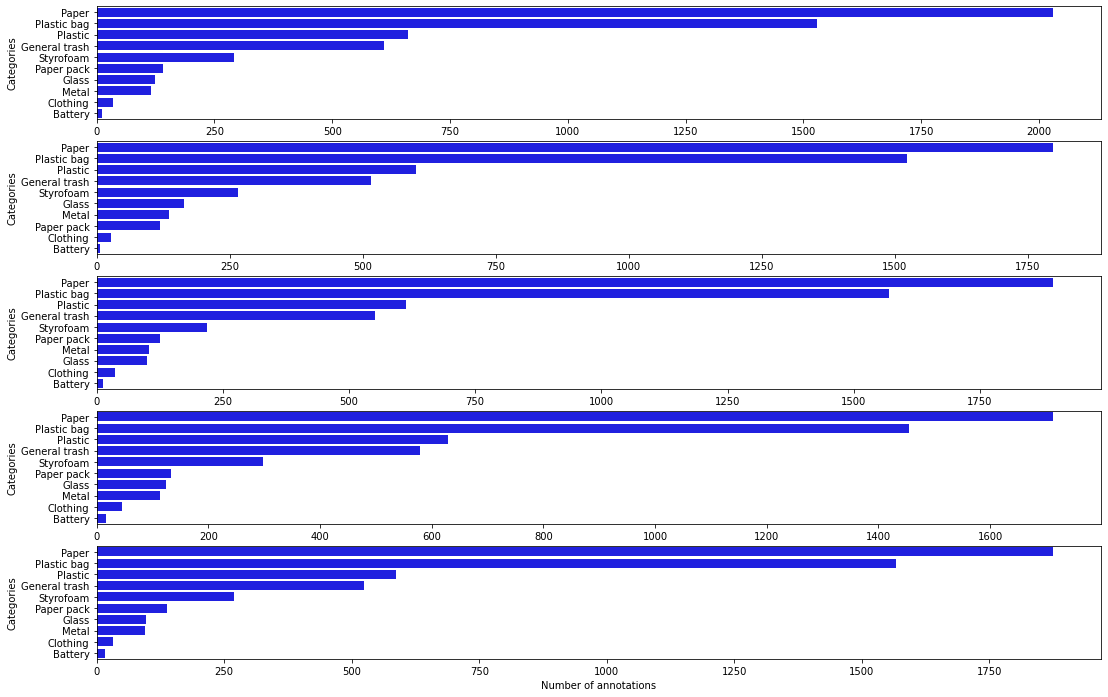

In [11]:
# Number of annotations in each fold
fig, axes = plt.subplots(5)
fig.set_size_inches(18, 12)

for idx, val_data in enumerate(val_data_list) :
    cat_dist = segmentation_stf_kfold.category_annotations(val_data).reshape(len(val_data['categories']),)
    df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_dist})
    df = df.sort_values('Number of annotations', 0, False)
    sns.barplot(x="Number of annotations", y="Categories", data=df, label="Total", color="b", ax=axes[idx])

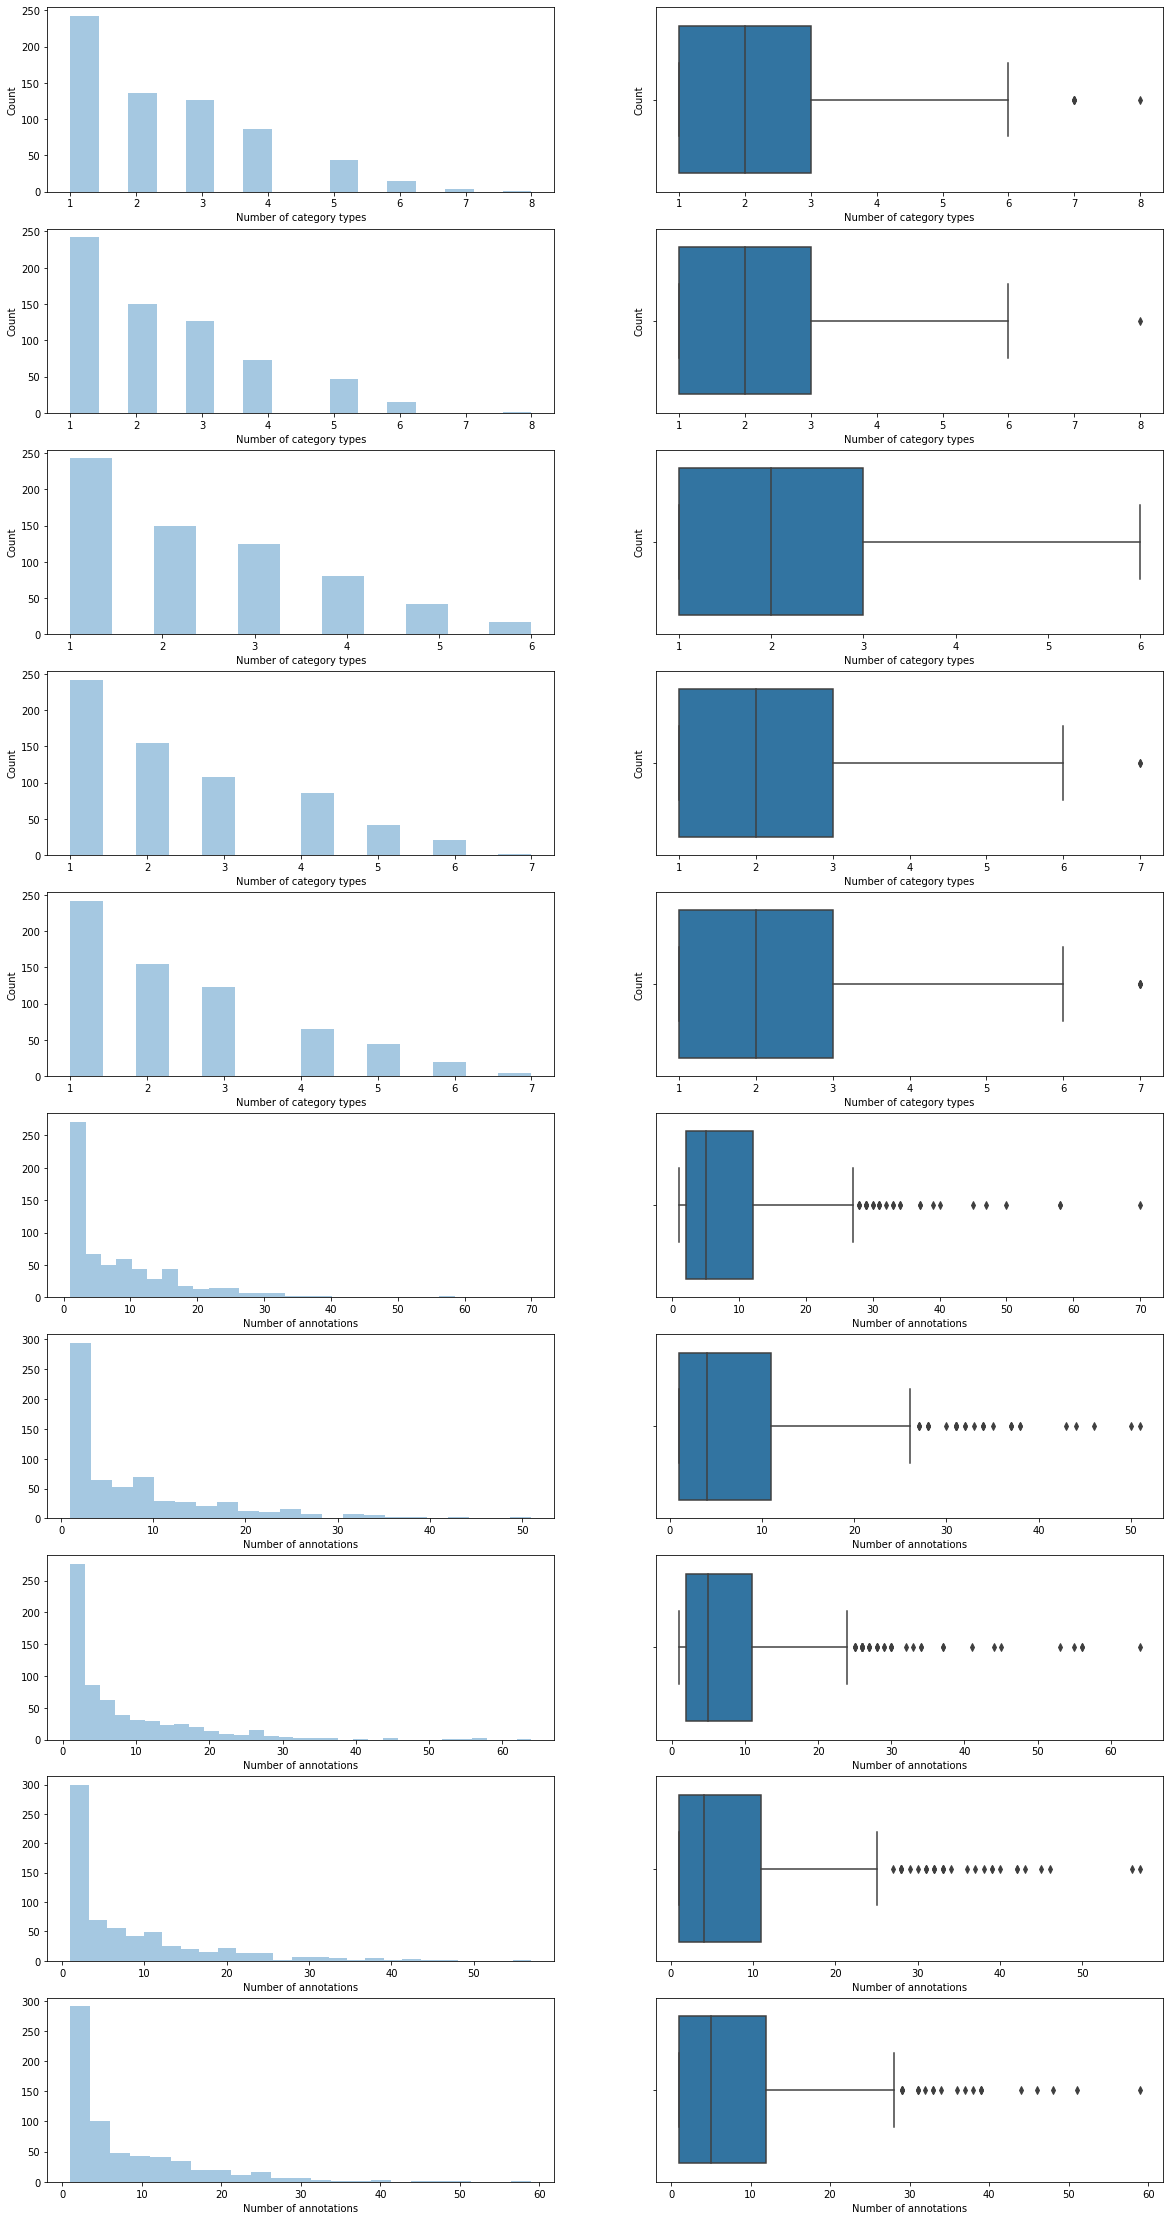

In [12]:
fig, axes = plt.subplots(10, 2)
fig.set_size_inches(20, 40)

for idx, val_data in enumerate(val_data_list) :
    df = segmentation_stf_kfold.get_dataframe(val_data)
    all_cat_num = df.groupby('image_id')['category_id'].apply(lambda x: len(set(x))).values
    all_ann_num = df.groupby('image_id').apply(lambda x: len(x)).values

    sns.distplot(all_cat_num, ax=axes[idx][0], kde=False)
    sns.boxplot(all_cat_num, ax=axes[idx][1])
    sns.distplot(all_ann_num, ax=axes[idx+5][0], kde=False)
    sns.boxplot(all_ann_num, ax=axes[idx+5][1])
    
    axes[idx][0].set(xlabel='Number of category types', ylabel='Count')
    axes[idx][1].set(xlabel='Number of category types', ylabel='Count')
    axes[idx+5][0].set(xlabel='Number of annotations')
    axes[idx+5][1].set(xlabel='Number of annotations')

In [13]:
# Sort and save json file
train_data_list = segmentation_stf_kfold.sort_data(train_data_list)
val_data_list = segmentation_stf_kfold.sort_data(val_data_list)
segmentation_stf_kfold.save_data(train_json_list, val_json_list, train_data_list, val_data_list)

kfold_1_train.json saved
kfold_1_val.json saved
kfold_2_train.json saved
kfold_2_val.json saved
kfold_3_train.json saved
kfold_3_val.json saved
kfold_4_train.json saved
kfold_4_val.json saved
kfold_5_train.json saved
kfold_5_val.json saved
Done
